In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = [30,15]

In [53]:
df1 = pd.read_csv('bank.csv', delimiter=";")
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [43]:
# Choosing the columns which are needed
df = df1[['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'y']]

In [41]:
df.head()

,job,marital,default,housing,loan,poutcome,y
0,unemployed,married,no,no,no,unknown,no
1,services,married,no,yes,yes,failure,no
2,management,single,no,yes,no,failure,no
3,management,married,no,yes,yes,unknown,no
4,blue-collar,married,no,yes,no,unknown,no


In [19]:
# One hot encoding the dataframe
# One hot encoding is the process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model
data = pd.get_dummies(df, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [20]:
data.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
2,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
3,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [21]:
data.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [22]:
data.drop(data.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)

In [27]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
logreg = LogisticRegression(solver='lbfgs',random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy: 0.89


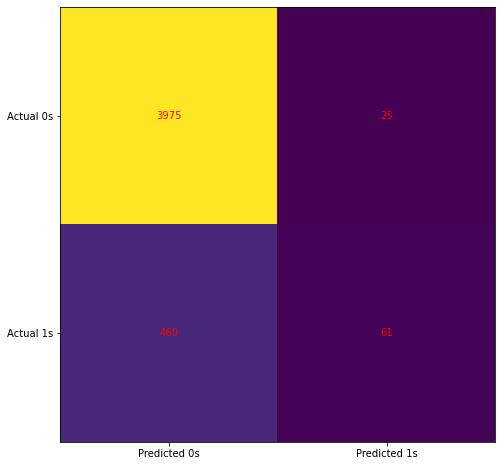

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, logreg.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.89      1.00      0.94       993
         yes       0.89      0.12      0.21       138

    accuracy                           0.89      1131
   macro avg       0.89      0.56      0.57      1131
weighted avg       0.89      0.89      0.85      1131

